Start with the importing the depedencies

In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.regularizers import l2

In [3]:
with_mask_files = os.listdir('archive\with_mask')
print(with_mask_files[0:5])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']


In [4]:
without_mask_files = os.listdir('archive\without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [5]:
print("Number of with mask images:", len(with_mask_files))
print("Number of without mask images:", len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Now we are going to create the labels for the two class of images

with mask --> 1
without mask --> 0

In [6]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [7]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [8]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Now we are going to display the some images

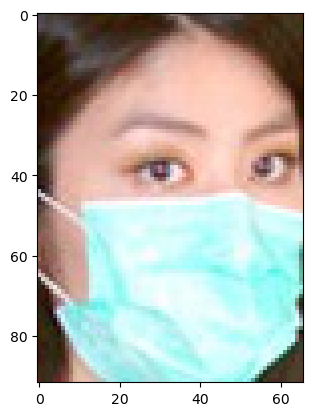

In [9]:
img = mpimg.imread('archive\with_mask\with_mask_3.jpg')
imgplot = plt.imshow(img)
plt.show()

Image preprocessing

In [10]:
with_mask_path = 'archive\with_mask/'

data = []
for img_file in with_mask_files:
    
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    
without_mask_path = 'archive\without_mask/'

for img_file in without_mask_files:
    
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

c:\Users\VAIBHAVRAI\anaconda3\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [11]:
len(data)

7553

In [12]:
data[0].shape

(128, 128, 3)

In [13]:
data[0]

array([[[50, 58, 31],
        [46, 54, 34],
        [56, 59, 42],
        ...,
        [26, 32, 25],
        [29, 33, 18],
        [34, 40, 16]],

       [[47, 55, 30],
        [49, 57, 37],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [38, 42, 31],
        [31, 41, 22]],

       [[52, 58, 37],
        [50, 59, 38],
        [59, 64, 36],
        ...,
        [45, 44, 30],
        [29, 35, 28],
        [20, 30, 17]],

       ...,

       [[63, 72, 37],
        [66, 76, 41],
        [74, 84, 50],
        ...,
        [ 5,  4,  0],
        [20, 19, 15],
        [17, 17, 12]],

       [[59, 71, 34],
        [60, 70, 39],
        [68, 76, 50],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 29],
        [54, 64, 37],
        [57, 63, 43],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [20, 12, 13]]], dtype=uint8)

Converting image list and label list to numpy arrays

In [14]:
X = np.array(data)
Y = np.array(labels)

In [15]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


Test Train Split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


Prefer to do scalling all the time 

In [18]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [19]:
X_train_scaled[0]

array([[[0.88235294, 0.92156863, 0.77647059],
        [0.82352941, 0.84705882, 0.72941176],
        [0.74117647, 0.7372549 , 0.6627451 ],
        ...,
        [0.73333333, 0.71372549, 0.64705882],
        [0.70980392, 0.68235294, 0.59215686],
        [0.64705882, 0.71372549, 0.52156863]],

       [[0.87843137, 0.89411765, 0.85098039],
        [0.79215686, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75686275],
        ...,
        [0.77647059, 0.74509804, 0.70588235],
        [0.69411765, 0.6627451 , 0.60392157],
        [0.61960784, 0.71372549, 0.55294118]],

       [[0.80392157, 0.8       , 0.83921569],
        [0.86666667, 0.85882353, 0.89019608],
        [0.76470588, 0.74901961, 0.77254902],
        ...,
        [0.71764706, 0.67843137, 0.68235294],
        [0.68235294, 0.64705882, 0.62745098],
        [0.68235294, 0.79607843, 0.65098039]],

       ...,

       [[0.60784314, 0.69019608, 0.78039216],
        [0.62745098, 0.70588235, 0.77254902],
        [0.64705882, 0

Building the convolution layers

In [20]:
import tensorflow as tf 
from tensorflow import keras

In [35]:
num_of_classes = 2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu',kernel_regularizer=l2(0.01)))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu',kernel_regularizer=l2(0.01)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [36]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training the neural network

In [37]:
history = model.fit(X_test_scaled,Y_train,validation_split=0.1, epochs=5)

Epoch 1/5
43/43 [==============================] - 3s 49ms/step - loss: 2.3635 - accuracy: 0.5004 - val_loss: 1.5197 - val_accuracy: 0.5132
Epoch 2/5
43/43 [==============================] - 2s 35ms/step - loss: 1.2909 - accuracy: 0.5092 - val_loss: 1.1256 - val_accuracy: 0.5197
Epoch 3/5
43/43 [==============================] - 2s 36ms/step - loss: 1.0447 - accuracy: 0.4820 - val_loss: 0.9776 - val_accuracy: 0.5132
Epoch 4/5
43/43 [==============================] - 2s 36ms/step - loss: 0.9386 - accuracy: 0.5033 - val_loss: 0.9036 - val_accuracy: 0.5132
Epoch 5/5
43/43 [==============================] - 1s 35ms/step - loss: 0.8813 - accuracy: 0.4915 - val_loss: 0.8604 - val_accuracy: 0.4868


Model_Evaluation

In [38]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print(accuracy)

48/48 [==============================] - 1s 16ms/step - loss: 0.8603 - accuracy: 0.4911
0.49106553196907043


Lets plot the accuracy and the loss 

In [25]:
# h = history

# # PLOT THE LOSS VAL
# plt.plot(h.history['loss'], label = 'train_loss')
# plt.plot(h.history['val_loss'], label = 'validation_loss')
# plt.legend()
# plt.show()


# # PLOT THE ACCURACY VALUES
# plt.plot(h.history['accuracy'], label = 'train_accuracy')
# plt.plot(h.history['val_accuracy'], label = 'validation_accuracy')
# plt.legend()
# plt.show()

Predictive system

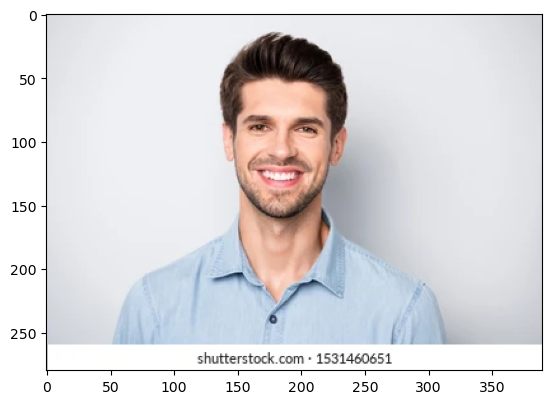

1/1 [==============================] - 0s 47ms/step
[[0.6156983 0.4509725]]
0
The is not wearning the mask


In [31]:
input_image_path = input('Path of the image to be predicted')
input_image = cv2.imread(input_image_path)
img = mpimg.imread(input_image_path)
imgplot = plt.imshow(img)
plt.show()
input_image_resized = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)


input_predi_label = np.argmax(input_prediction)
print(input_predi_label)

if input_predi_label == 1:
    print("The is wearning the mask")
    
else:
    print("The is not wearning the mask")

In [32]:
model.save(' face mask .h5')